In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import math

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/thomasreji155/Time-Series-Analysis/main/dataset/AirPassengers.csv')
df.columns = ['month','passengers']
df.month = pd.to_datetime(df.month)
df.set_index(df.month,inplace = True)
df.drop('month', axis = 1, inplace = True)
df.head()

,passengers
month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


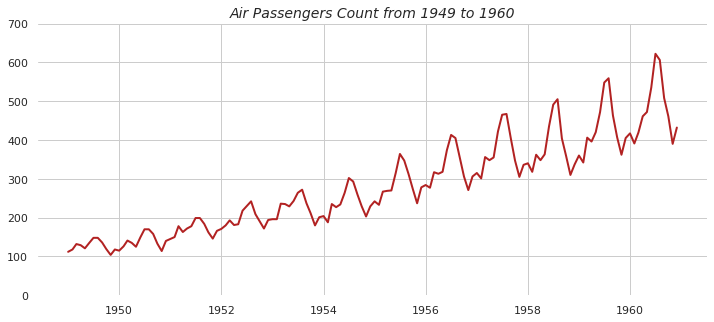

In [ ]:
sns.set()
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
plt.ylim(0,700)
plt.plot('passengers',data = df,color = 'firebrick',linewidth = 2)
plt.title('Air Passengers Count from 1949 to 1960', fontstyle ='italic',fontsize = 14)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.box(False)

In [3]:
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import LSTM, Flatten 
from sklearn.preprocessing import MinMaxScaler
from keras.layers import ConvLSTM2D
from keras.callbacks import EarlyStopping

In [4]:

dataset = df.values 
dataset = dataset.astype('float32')

In [5]:
scaler = MinMaxScaler(feature_range = (0,1))
dataset = scaler.fit_transform(dataset)

In [6]:
train_size = int(len(dataset)*0.7)
test_size = len(dataset)-train_size 
train = dataset[0:train_size,:]
test = dataset[train_size:len(dataset),:]

In [7]:
def to_sequences(dataset,seq_size = 1): 
    x = []
    y = []
    for i in range(len(dataset)-seq_size-1):
        window = dataset[i:(i+seq_size),0]
        x.append(window)
        y.append(dataset[i+seq_size,0])
    return np.array(x),np.array(y) 

In [8]:
seq_size = 5 
trainX,trainY = to_sequences(train,seq_size)
testX,testY = to_sequences(test,seq_size)

In [9]:
trainX 

array([[0.01544401, 0.02702703, 0.05405405, 0.04826255, 0.03281853],
       [0.02702703, 0.05405405, 0.04826255, 0.03281853, 0.05984557],
       [0.05405405, 0.04826255, 0.03281853, 0.05984557, 0.08494207],
       [0.04826255, 0.03281853, 0.05984557, 0.08494207, 0.08494207],
       [0.03281853, 0.05984557, 0.08494207, 0.08494207, 0.06177607],
       [0.05984557, 0.08494207, 0.08494207, 0.06177607, 0.02895753],
       [0.08494207, 0.08494207, 0.06177607, 0.02895753, 0.        ],
       [0.08494207, 0.06177607, 0.02895753, 0.        , 0.02702703],
       [0.06177607, 0.02895753, 0.        , 0.02702703, 0.02123553],
       [0.02895753, 0.        , 0.02702703, 0.02123553, 0.04247104],
       [0.        , 0.02702703, 0.02123553, 0.04247104, 0.07142857],
       [0.02702703, 0.02123553, 0.04247104, 0.07142857, 0.05984557],
       [0.02123553, 0.04247104, 0.07142857, 0.05984557, 0.04054055],
       [0.04247104, 0.07142857, 0.05984557, 0.04054055, 0.08687258],
       [0.07142857, 0.05984557, 0.

In [ ]:
print('Shape of training set: {}'.format(trainX.shape))
print('Shape of test set: {}'.format(testX.shape))

Shape of training set: (94, 5)
Shape of test set: (38, 5)


In [ ]:
# reshaping to [samples,time stamps, features]
trainX = np.reshape(trainX, (trainX.shape[0],1,trainX.shape[1]))
testX  = np.reshape(testX,(testX.shape[0],1,testX.shape[1]))

In [ ]:
print('Shape of training set: {}'.format(trainX.shape))
print('Shape of test set: {}'.format(testX.shape))

Shape of training set: (94, 1, 5)
Shape of test set: (38, 1, 5)


In [ ]:
model = Sequential()
model.add(LSTM(64,input_shape =(None,seq_size)))
model.add(Dense(32))
model.add(Dense(1))
model.compile(
    loss = tf.keras.losses.MeanSquaredError(),
    optimizer = 'adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                17920     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 20,033
Trainable params: 20,033
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(trainX,trainY, validation_data = (testX,testY),
          verbose = 0, epochs = 100)

In [ ]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [ ]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [ ]:
trainScore = math.sqrt(
    tf.keras.losses.MeanSquaredError(testY[0],testPredict[:,0]))

/usr/local/lib/python3.7/dist-packages/keras/utils/losses_utils.py:82: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if key not in cls.all():


ValueError: ignored

In [ ]:
import math

In [ ]:
testY

array([[346.99999379, 304.99998716, 335.99999132, 339.99999783,
        317.99999288, 362.00000277, 348.00001085, 362.99998896,
        434.99999813, 491.00002756, 505.00001948, 403.99999397,
        359.00001333, 310.00001073, 337.00000838, 359.99999952,
        342.00000109, 406.0000281 , 395.99998094, 420.00002002,
        471.99998119, 548.00004318, 559.00001477, 462.99998197,
        407.00001429, 362.00000277, 404.99998016, 416.9999997 ,
        390.99998824, 418.99997208, 461.00000959, 471.99998119,
        535.00003745, 622.00000929, 606.00004499, 507.99997805,
        461.00000959, 390.00000205]])